In [41]:
import geopandas as gpd
import momepy
from core import utils, algorithms

In [42]:
momepy.__version__

'0.8.0a3.dev22+g2056151'

<Axes: >

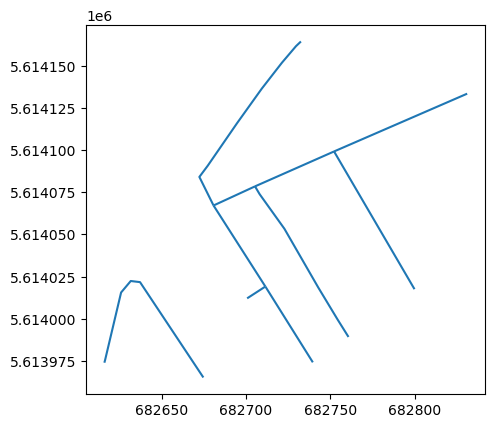

In [43]:
gdf = gpd.read_parquet("messed_coins.parquet")
gdf = gdf.reset_index(drop=True)
gdf.plot()

<Axes: >

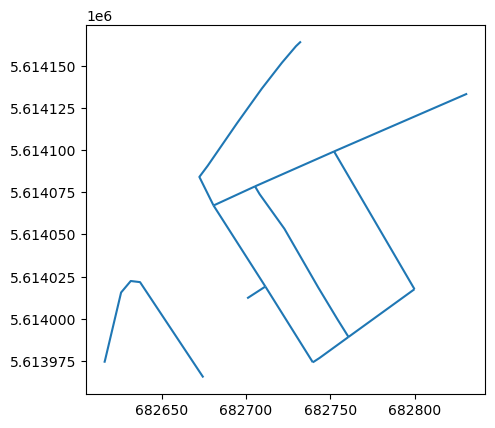

In [44]:
case = "Liège"
roads = utils.read_no_degree_2_roads(case)
roads = roads[~roads.geometry.duplicated()].reset_index()
roads = roads.iloc[
    roads.sindex.query(
        geometry = gdf.unary_union.envelope,
        predicate = "contains"
        )
].reset_index(drop=True)
roads.plot()

<Axes: >

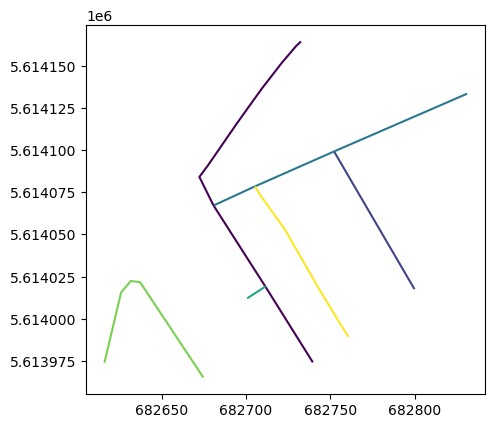

In [45]:
gdf = algorithms.common.continuity(gdf)
gdf.plot(column="coins_group")

<Axes: >

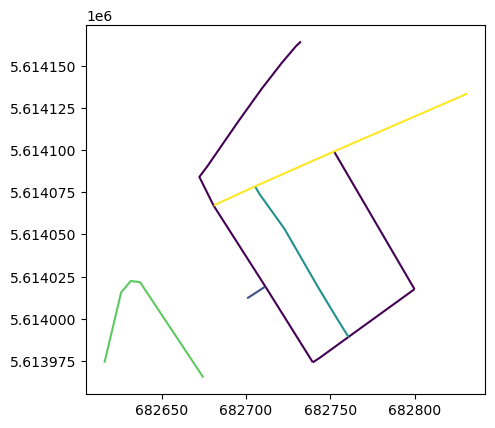

In [46]:
roads = algorithms.common.continuity(roads)
roads.plot(column="coins_group")